# Non-Linear Least Squares Approximations
By Nitin Gupta

## Introduction
Usually, a linear least squares regression approximates on a linear combination of basis functions. While many functions can be structured in this form, real world applications of linear regressions often contain functions where the model in question might be non-linear.
This nonlinear function, $f(x)$, might be respresented as
<br>
$$y = f(x; a_0, a_1, ..., a_N)$$
where,
<br>
$y  \equiv$ measured value
<br>
$x  \equiv$ paramter from which $f$ is evaluated
<br>
$a_n \equiv$ coefficients for the function fit
<br>
<br>
The particular difference between linear and non-linear least squares approximation is that the function in non-linear least squares can take on any of the following forms,
<br>
$$\quad f(x) = A+Bsin(Cx) \quad \quad f(x) = A+Be^{Cx^2} \quad \quad f(x) = A+Bln(Cx)$$

<br>
<br> Unlike the linear least-squares regression approximations, these functions can not be directly put in the $Ax=b$ form.
To simplify $f(x)$ into a more simpler form where we can use the power of linear algebra to compute the solution, we recall the Taylor series for N-parameters.
<br>
$$f(x_1, x_2,..., x_N) \approx f(\tilde{x_1}, \tilde{x_2}, ..., \tilde{x_N}) + \sum_{n=1}^N \frac{\partial f}{\partial x_n} \Delta x_n$$
<br>
where $\Delta x_n = x_n - \tilde{x_n}$. Here, we ignore the higher order terms because the first-order is more than sufficient for us to compute our approximations.

## Method

### Solution for Non-Linear Functions
We achieve the solution by firt writing our function at every single
one of our measured sample points. If we have M samples, then we simply our equations for different values of x.
<br> Here we also include these residual terms to accomodate the fact that these equations are still approximations and contain error.
<br> $y_1 = f(x_1, a_0, a_1, ..., a_N) + e_1$
<br> $y_2 = f(x_2, a_0, a_1, ..., a_N) + e_2$
<br> $\vdots$
<br> $y_M = f(x_M, a_0, a_1, ..., a_N) + e_M$
<br> <br>
Next, we transform the non-linear equatiosn into linear equations by expanding the into their Taylor Series approximations,
<br>
$$y_1 = f(x_1) + \frac{\partial f(x_1)}{\partial a_0}\Delta a_0 + \frac{\partial f(x_1)}{\partial a_1}\Delta a_1 + ... + \frac{\partial f(x_1)}{\partial a_N}\Delta a_N + e_1$$
<br>
$$y_2 = f(x_2) + \frac{\partial f(x_2)}{\partial a_0}\Delta a_0 + \frac{\partial f(x_2)}{\partial a_1}\Delta a_1 + ... + \frac{\partial f(x_2)}{\partial a_N}\Delta a_N + e_2$$
<br>
$$\vdots$$
<br>
$$y_M = f(x_M) + \frac{\partial f(x_M)}{\partial a_0}\Delta a_0 + \frac{\partial f(x_M)}{\partial a_1}\Delta a_1 + ... + \frac{\partial f(x_M)}{\partial a_N}\Delta a_N + e_M$$
<br>
<br>
Now, we can write these equations in their linear forms,
<br>
$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_M \end{bmatrix} = \begin{bmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_M) \end{bmatrix}
+
\begin{bmatrix} \frac{\partial f(x_1)}{\partial a_0} \ \frac{\partial f(x_1)}{\partial a_1} \ \ldots \frac{\partial f(x_1)}{\partial a_N} \\ \frac{\partial f(x_2)}{\partial a_0} \ \frac{\partial f(x_2)}{\partial a_1} \ \ldots \frac{\partial f(x_2)}{\partial a_N} \\ \vdots \\ 
\frac{\partial f(x_M)}{\partial a_0} \ \frac{\partial f(x_M)}{\partial a_1} \ \ldots \frac{\partial f(x_M)}{\partial a_N} \end{bmatrix}\begin{bmatrix} \Delta a_0 \\ \Delta a_1 \\ \vdots \\ \Delta a_N \end{bmatrix} + \begin{bmatrix} e_1 \\ e_2 \\ \vdots \\ e_M \end{bmatrix}
$$
<br> <br>
Now, following a similar approach that is used when solving a linear least-squares regression, we solve for the change in $a$.
<br>
Note, since we will implement the fit solution in an iterative algorithm, we can drop the residual term.
<br>
<br>
\begin{align*}
\begin{bmatrix} y \end{bmatrix} &= \begin{bmatrix} f \end{bmatrix} + \begin{bmatrix} Z \end{bmatrix} \begin{bmatrix} \Delta a \end{bmatrix}
\\ 
\begin{bmatrix} y \end{bmatrix} - \begin{bmatrix} f \end{bmatrix} &= \begin{bmatrix} Z \end{bmatrix} \begin{bmatrix} \Delta a \end{bmatrix}
\\
\begin{bmatrix} d \end{bmatrix} &= \begin{bmatrix} Z \end{bmatrix} \begin{bmatrix} \Delta a \end{bmatrix}
\\
\begin{bmatrix} Z \end{bmatrix}^T \begin{bmatrix} d \end{bmatrix}  &= \begin{bmatrix} Z \end{bmatrix}^T \begin{bmatrix} Z \end{bmatrix} \begin{bmatrix} \Delta a \end{bmatrix}
\\ \begin{bmatrix} \Delta a \end{bmatrix} &= (\begin{bmatrix} Z \end{bmatrix}^T \begin{bmatrix} Z \end{bmatrix})^{-1} \begin{bmatrix} Z \end{bmatrix}^T \begin{bmatrix} d \end{bmatrix}
\end{align*}
<br>
From the last equation, it is important to notice that the $\Delta a$ matrix only conveys how much the coefficients matrix of $a$ needs to be adjusted given an initial guess of $a_0$.
<br>
The calculation must be iterated several times to find the actual coefficients of $a$.

### Implementation and Results of the Non-Linear least squares algorithm

First we begin by importing the required libraries (sources for the libraries can be found at the end).

In [1]:
# Imports for the data and helper functions
import numpy as np
from matplotlib import pyplot as plt 

To simplify this problem further, we will be implementing the non-linear least squares regression on the Gaussian Function
$$ f(x) = Ae^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
<br>
<br>
Now, we first identify the unknown parametrs in the equation,
<br> $$\begin{bmatrix} a\end{bmatrix} = \begin{bmatrix} A \\ \mu \\ \sigma \end{bmatrix} $$


Our first step is to generate random data and plot a histogram for them.

Inital random parameters:
mu:  -1.2455733036508123  sigma:  1.7274432373255997  A:  0.5742527893990242


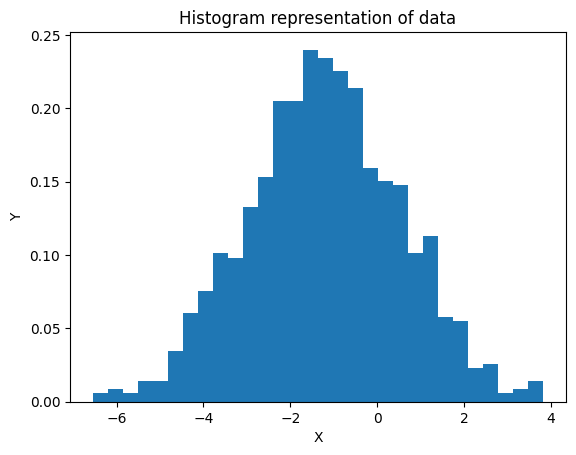

In [2]:
# Get the data
sigma = -1
while (sigma < 0):
    rng = np.random.Generator(np.random.PCG64())
    mu = rng.standard_normal()
    sigma = rng.standard_normal()
    A = rng.standard_normal()
print("Inital random parameters:")
print("mu: ", mu, " sigma: ", sigma, " A: ", A)

s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.title('Histogram representation of data')
plt.xlabel('X')
plt.ylabel('Y')

axes = plt.gca()

# Get the maximum and mininum values for the two axis
ymin, ymax = plt.gca().get_ylim()
xmin, xmax = plt.gca().get_xlim()

Our $\begin{bmatrix} Z\end{bmatrix}$ matrix will have the following form,
$$ \begin{bmatrix} Z \end{bmatrix} = \begin{bmatrix} \frac{\partial f(x_1)}{\partial A}\ \frac{\partial f(x_1)}{\partial \mu}\ \frac{\partial f(x_1)}{\partial \sigma} \\ \\\frac{\partial f(x_2)}{\partial A}\ \frac{\partial f(x_2)}{\partial \mu}\ \frac{\partial f(x_2)}{\partial \sigma} \\ \\ \vdots \\ \\ \frac{\partial f(x_m)}{\partial A}\ \frac{\partial f(x_m)}{\partial \mu}\ \frac{\partial f(x_m)}{\partial \sigma} \end{bmatrix} $$
<br>
To compute the terms in the $\begin{bmatrix} Z\end{bmatrix}$ matrix, we derive them by hand,
$$ \frac{\partial f(x)}{\partial A} = e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \frac{f(x)}{A} $$
$$ \frac{\partial f(x)}{\partial \mu} = \frac{2(x-\mu)}{\sigma^2}Ae^{-\frac{(x-\mu)^2}{2\sigma^2}} 
= \frac{2(x-\mu)}{\sigma^2}*f(x) $$
$$ \frac{\partial f(x)}{\partial \sigma} = \frac{2(x-\mu)^2}{\sigma^3}Ae^{-\frac{(x-\mu)^2}{2\sigma^2}} 
= \frac{2(x-\mu)^2}{\sigma^3}*f(x) $$
<br>
Substituting our calculated partial derivatives in the $\begin{bmatrix} Z \end{bmatrix}$ matrix, we get
$$
\begin{bmatrix} Z \end{bmatrix} = \begin{bmatrix} \frac{f(x_1)}{A}\ \frac{2(x-\mu)}{\sigma^2}f(x_1)
\ \frac{2(x-\mu)^2}{\sigma^3}f(x_1)
 \\ \\\frac{f(x_2)}{A}\ \frac{2(x-\mu)}{\sigma^2}f(x_2)
\ \frac{2(x-\mu)^2}{\sigma^3}f(x_2) \\ \\ \vdots \\ \\ \frac{f(x_m)}{A}\ \frac{2(x-\mu)}{\sigma^2}f(x_m)
\ \frac{2(x-\mu)^2}{\sigma^3}f(x_m) \end{bmatrix} $$

Now, we are able to define our own fitting function...

In [3]:
# define our own non-linear fitting method
def NonLinearFit(x, data, i, A, x0, s, shape, ploton = False):

    if ploton:
        # Plot the initial graph
        plt.title('Iteration ' + str(i))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.plot(x,data, "ob") 
        plt.show()

    # From the current values of the coefficients, evaluate f
    f = A*np.exp(-np.square(((x - x0)/s)))

    # Calculate the error
    d = data[:] - f
    d.shape = (shape, 1)
    
    # partial derivatives of f(x)
    z1 = f/A
    z2 = 2*f*(x-x0)/np.square(s)
    z3 = 2*f*np.square((x-x0))/np.power(s, 3)
    z1.shape = (np.shape(z1)[0], 1)
    z2.shape = (np.shape(z2)[0], 1)
    z3.shape = (np.shape(z3)[0], 1)
    
    Z = np.concatenate([z1, z2, z3], axis = 1)
    
    # Solve for delta a using the least squares approach
    da1 = np.linalg.inv(np.matmul(Z.transpose(),Z))
    da2 = np.matmul(Z.transpose(), d)
    da = np.matmul(da1, da2)

    # Adjust the respective curve paramters from the delta a
    A += da[0]
    x0 += da[1]
    s += da[2]
    
    error = max(abs(da/A)[0], abs(da/x0)[0], abs(da/s)[0])
    
    return (A, x0, s, error)

Next, we compute the line of best fit from the non-linear least squares regression using our model,

End values for the coefficient parameters are
A =  0.5742527893990242
x0 =  -1.2455733036508125
s =  5.968120276363896


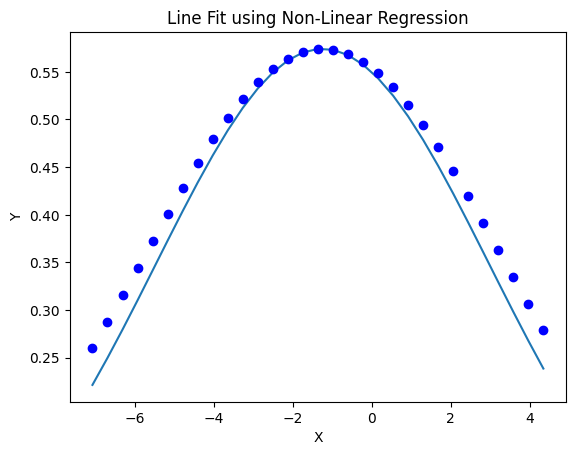

In [4]:
# Compute the points and convert them to data to numpy friendly versions
x = np.array(bins)  # represents the x axis values
data = np.array(A*np.exp(-np.square(((x - mu)/(2*sigma**2)))))  # represents the y axis values

# Make inital guesses for the coefficients
A = np.max(data)
x0 = np.mean(x)
s = 0.5*(np.max(x) - np.min(x))

for i in range(100):    
    A, x0, s, error = NonLinearFit(x, data ,i, A, x0, s, np.shape(data)[0])
#     print('{:9}{:>20}{:>20}{:>20}{:>25}'.format('iteration', 'A', 'x0', 's', 'error'))
#     print('{:9}{:>20}{:>20}{:>20}{:>25}'.format(i, A[0], x0[0], s[0], error[0]))
    
print("End values for the coefficient parameters are")
print("A = ", A[0])
print("x0 = ", x0[0])
print("s = ", s[0])

x = np.linspace(xmin, xmax, np.shape(data)[0])
y = A*np.exp(-np.square(((x - mu)/(2*sigma**2))))

plt.plot(x, y)
plt.plot(x, data, "ob") 
plt.title('Line Fit using Non-Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Next, we fit the data with non-linear least square using pre-existing libraries to check our fit.

(31,)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 132
    # data points      = 31
    # variables        = 3
    chi-square         = 2.7733e-32
    reduced chi-square = 9.9048e-34
    Akaike info crit   = -2352.99640
    Bayesian info crit = -2348.69444
[[Variables]]
    A:      0.57425279 +/- 9.4104e-18 (0.00%) (init = 0.5740338)
    mu:    -1.24557330 +/- 8.7877e-17 (0.00%) (init = -1.362127)
    sigma: -1.72744324 +/- 2.7207e-17 (0.00%) (init = 5.189261)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma) = 0.665


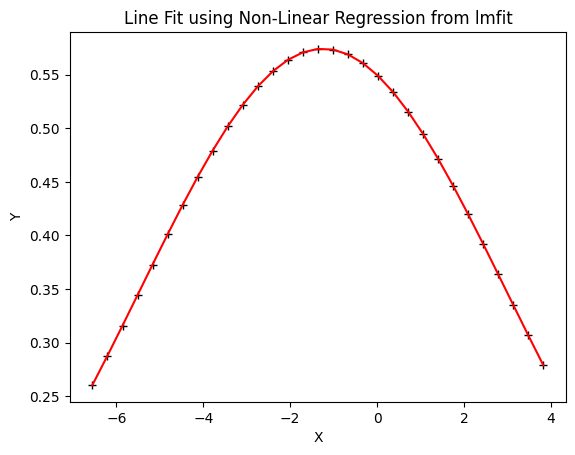

In [5]:
# https://stackoverflow.com/questions/7165201/python-nonlinear-least-squares-fitting
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit

# create data to be fitted
x = np.array(bins)
data = A*np.exp(-np.square(((x - mu)/(2*sigma**2))))
print(np.shape(x))

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    A = params['A']
    mu = params['mu']
    sigma = params['sigma']
    model = A*np.exp(-np.square(((x - mu)/(2*sigma**2))))
    return model - data

# create a set of Parameters
params = Parameters()
# Guesses
params.add('A', value= np.max(data))
params.add('mu', value= np.mean(x))
params.add('sigma', value= 0.5*(np.max(x) - np.min(x)))

# do fit, here with leastsq model
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
kws  = {'options': {'maxiter':10}}
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
# plt.hist(s, 30, density=True)
# plt.plot(x, data, 'k+')
# plt.plot(x, final, 'r')
# plt.show()

import pylab
pylab.plot(x, data, 'k+')
pylab.plot(x, final, 'r')
plt.title('Line Fit using Non-Linear Regression from lmfit')
plt.xlabel('X')
plt.ylabel('Y')
pylab.show()

## Conculsions

As we can in the comparision below, our non-linear fit model is very comparable to one provided in actual fitting libraries and we can conclude that this non-linear least squares approximation does indeed work.

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

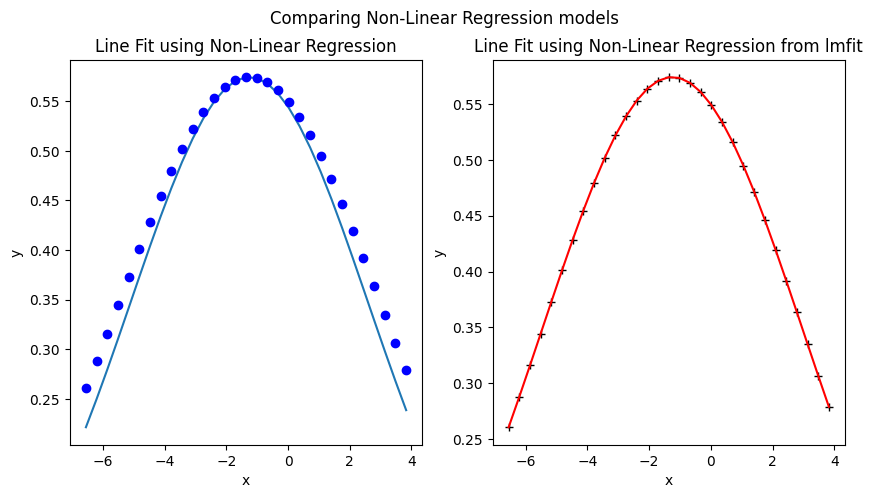

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle('Comparing Non-Linear Regression models')

ax1.plot(x, y)
ax1.plot(x, data, "ob")

ax1.set_title('Line Fit using Non-Linear Regression')
ax1.set(xlabel='x', ylabel='y')

ax2.plot(x, data, 'k+')
ax2.plot(x, final, 'r')

ax2.set_title('Line Fit using Non-Linear Regression from lmfit')
ax2.set(xlabel='x', ylabel='y')


## Sources used:
* Computing partial derivatives:
    * [Respective to $\sigma$](https://www.wolframalpha.com/input?i=d%2Fds+%28a%29*exp%28-%28x-u%29%5E2%2F%282s%5E2%29%29)
    * [Respective to $\mu$](https://www.wolframalpha.com/input?i=d%2Fdu+%28a%29*exp%28-%28x-u%29%5E2%2F%282s%5E2%29%29)
    * [Respective to $A$](https://www.wolframalpha.com/input?i=d%2Fda+%28a%29*exp%28-%28x-u%29%5E2%2F%282s%5E2%29%29)

* Theory behind the non-linear least squares implementations,
    * [Nonlinear Least Squares](https://www.youtube.com/watch?v=8evmj2L-iCY)
    * [Topic 5b -- Nonlinear regression](https://www.youtube.com/watch?v=7V9KP7BkO1M)

* Generating data,
    * [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) (reference to the gaussian function)
    * [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html) (for random values generated)